# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* Adam
* RMSprop
* SGD
* AdaGrad

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[128,64,32]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=unit, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 35
MOMENTUM = 0.95
BATCH_SIZE = 256

# optimizer is Adam

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-lr-%s" %str(lr)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 5s 92us/step - loss: 1.3654 - accuracy: 0.5152 - val_loss: 1.4619 - val_accuracy: 0.4857
Epoch 20/35
50000/50000 [==============================] - 5s 98us/step - loss: 1.3622 - accuracy: 0.5143 - val_loss: 1.4501 - val_accuracy: 0.4905
Epoch 21/35
50000/50000 [==============================] - 4s 90us/step - loss: 1.3509 - accuracy: 0.5196 - val_loss: 1.4296 - val_accuracy: 0.4937
Epoch 22/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3408 - accuracy: 0.5228 - val_loss: 1.4420 - val_accuracy: 0.4852
Epoch 23/35
50000/50000 [==============================] - 4s 89us/step - loss: 1.3351 - accuracy: 0.5242 - val_loss: 1.4651 - val_accuracy: 0.4849
Epoch 24/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3263 - accuracy: 0.5273 - val_loss: 1.4924 - val_accuracy: 0.4759
Epoch 25/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.3121 - accuracy: 0.5323 - val_loss: 1.4295

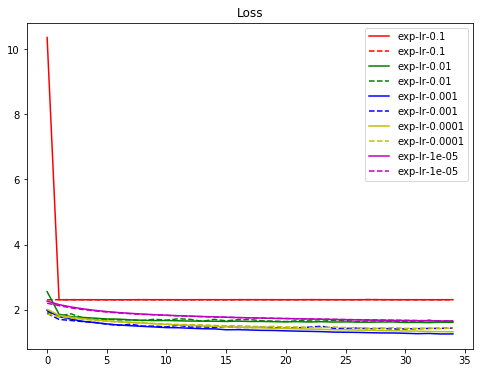

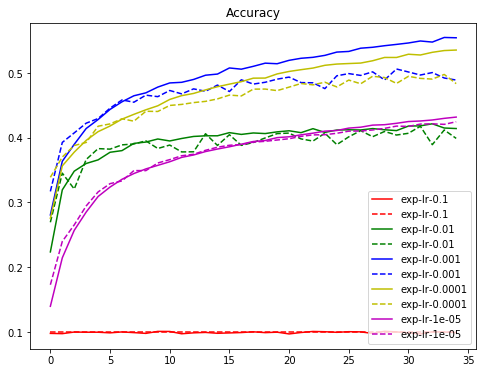

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# optimizer is RMSprop

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-lr-%s" %str(lr)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 5s 106us/step - loss: 1.4415 - accuracy: 0.4839 - val_loss: 1.5671 - val_accuracy: 0.4461
Epoch 20/35
50000/50000 [==============================] - 6s 111us/step - loss: 1.4287 - accuracy: 0.4912 - val_loss: 1.5999 - val_accuracy: 0.4406
Epoch 21/35
50000/50000 [==============================] - 5s 95us/step - loss: 1.4221 - accuracy: 0.4932 - val_loss: 1.5832 - val_accuracy: 0.4372
Epoch 22/35
50000/50000 [==============================] - 5s 93us/step - loss: 1.4117 - accuracy: 0.4994 - val_loss: 1.4967 - val_accuracy: 0.4654
Epoch 23/35
50000/50000 [==============================] - 4s 89us/step - loss: 1.4057 - accuracy: 0.4991 - val_loss: 1.5337 - val_accuracy: 0.4581
Epoch 24/35
50000/50000 [==============================] - 4s 89us/step - loss: 1.3972 - accuracy: 0.5028 - val_loss: 1.5302 - val_accuracy: 0.4566
Epoch 25/35
50000/50000 [==============================] - 4s 89us/step - loss: 1.3879 - accuracy: 0.5060 - val_loss: 1.56

50000/50000 [==============================] - 5s 101us/step - loss: 1.4057 - accuracy: 0.5063 - val_loss: 1.5256 - val_accuracy: 0.4638
Epoch 33/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.3994 - accuracy: 0.5069 - val_loss: 1.4672 - val_accuracy: 0.4819
Epoch 34/35
50000/50000 [==============================] - 4s 87us/step - loss: 1.3918 - accuracy: 0.5103 - val_loss: 1.4540 - val_accuracy: 0.4858
Epoch 35/35
50000/50000 [==============================] - 4s 87us/step - loss: 1.3862 - accuracy: 0.5124 - val_loss: 1.5053 - val_accuracy: 0.4639
Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
__________________________________________

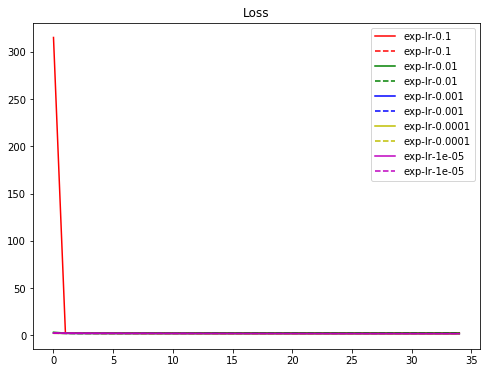

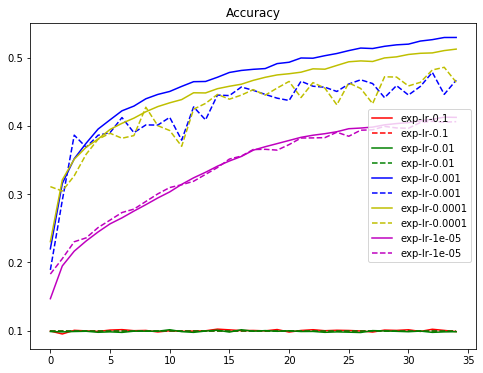

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# optimizer is SGD

In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(learning_rate=lr, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-lr-%s" %str(lr)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 4s 83us/step - loss: 1.3985 - accuracy: 0.5051 - val_loss: 1.4565 - val_accuracy: 0.4837
Epoch 20/35
50000/50000 [==============================] - 4s 82us/step - loss: 1.3858 - accuracy: 0.5081 - val_loss: 1.4480 - val_accuracy: 0.4878
Epoch 21/35
50000/50000 [==============================] - 4s 83us/step - loss: 1.3742 - accuracy: 0.5124 - val_loss: 1.4637 - val_accuracy: 0.4787
Epoch 22/35
50000/50000 [==============================] - 4s 82us/step - loss: 1.3616 - accuracy: 0.5151 - val_loss: 1.4323 - val_accuracy: 0.4972
Epoch 23/35
50000/50000 [==============================] - 4s 83us/step - loss: 1.3492 - accuracy: 0.5215 - val_loss: 1.4532 - val_accuracy: 0.4872
Epoch 24/35
50000/50000 [==============================] - 4s 82us/step - loss: 1.3358 - accuracy: 0.5261 - val_loss: 1.4309 - val_accuracy: 0.4931
Epoch 25/35
50000/50000 [==============================] - 4s 82us/step - loss: 1.3270 - accuracy: 0.5289 - val_loss: 1.4215

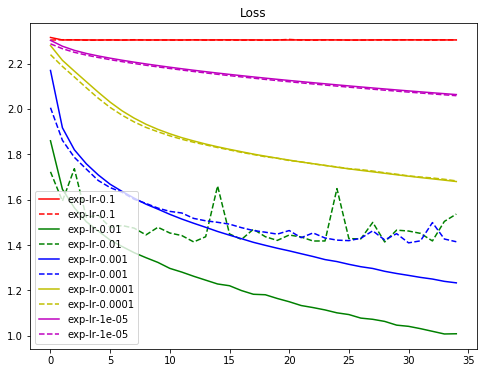

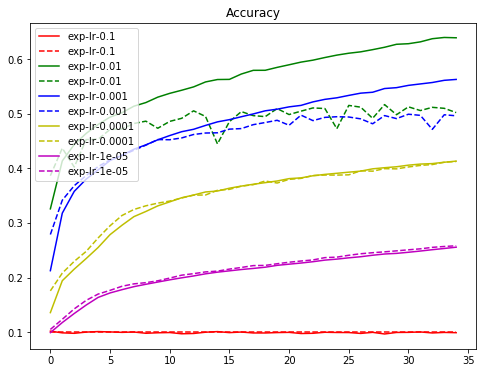

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# optimizer is AdaGrad

In [15]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.Adagrad(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-lr-%s" %str(lr)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [===============

50000/50000 [==============================] - 5s 95us/step - loss: 1.6495 - accuracy: 0.4220 - val_loss: 1.6558 - val_accuracy: 0.4182
Epoch 20/35
50000/50000 [==============================] - 5s 95us/step - loss: 1.6425 - accuracy: 0.4255 - val_loss: 1.6516 - val_accuracy: 0.4183
Epoch 21/35
50000/50000 [==============================] - 4s 87us/step - loss: 1.6366 - accuracy: 0.4251 - val_loss: 1.6443 - val_accuracy: 0.4222
Epoch 22/35
50000/50000 [==============================] - 5s 92us/step - loss: 1.6309 - accuracy: 0.4287 - val_loss: 1.6449 - val_accuracy: 0.4247
Epoch 23/35
50000/50000 [==============================] - 5s 95us/step - loss: 1.6248 - accuracy: 0.4313 - val_loss: 1.6342 - val_accuracy: 0.4268
Epoch 24/35
50000/50000 [==============================] - 4s 84us/step - loss: 1.6199 - accuracy: 0.4327 - val_loss: 1.6313 - val_accuracy: 0.4281
Epoch 25/35
50000/50000 [==============================] - 4s 81us/step - loss: 1.6144 - accuracy: 0.4352 - val_loss: 1.6312

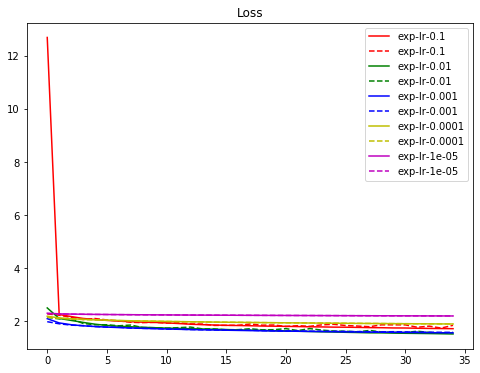

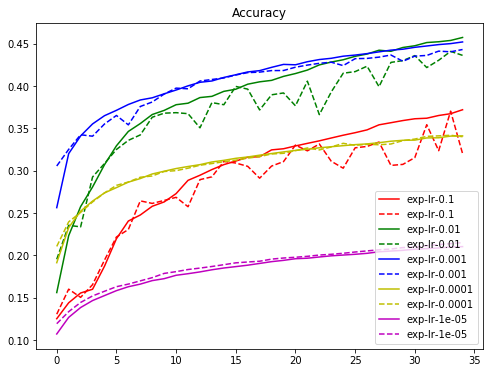

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 心得：
- Adam是RMSprop的改良版，皆為自適應調整learning_rate的算法。
- 可以明顯觀察到，在learning_rate為1e-4、1e-5時，Adam和RMSprop加速較為明顯。